# 1. importing_data.py


In [1]:
import xlrd
import agate
# import the necessary tools

# We are to import our unicef xls data
workbook = xlrd.open_workbook('./unicef_oct_2014.xls')
# type(workbook) # type: xlrd.book.Book
workbook.nsheets # this will let us print the number of sheets in our xls
workbook.sheet_names() # and this will print the names of all the sheets

['Child labour  ']

In [2]:
# There is only one sheet in our xls, so we will extract that as our sheet

sheet = workbook.sheets()[0]
# type(sheet) # type xlrd.sheet.Sheet
sheet.nrows # the number of rows in our sheet
sheet.row_values(0) # prints the row values at row 0

# This for loop prints the row and the corresponding row #, r
for r in range(sheet.nrows):
    print(r, sheet.row(r))

0 [text:'UNICEF global databases', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
1 [text:'Child labour', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
2 [text:'Updated November 2014', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
3 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
4 [empty:'', text:'Total (%)', empty:'', text:'Sex (%)', empty:'', text:'Place of residence (%)', empty:'', text:'Household wealth quintile (%)', empty:'', empty:'', empty:'', empty:'', text:'Reference Year', text:'Data Source']
5 [text:'Countries and areas', empty:'', empty:'', text:'Male', text:'Female', text:'Urban', text:'Rural', text:'Poorest', text:'Second', text:'Mi

In [3]:
# we will zip the column titles to eachother. this will create a tupled list that contains row4 and row5
title_rows = zip(sheet.row_values(4), sheet.row_values(5))
list(title_rows)
# title_rows is a zip type. An iterable type in Python

[('', 'Countries and areas'),
 ('Total (%)', ''),
 ('', ''),
 ('Sex (%)', 'Male'),
 ('', 'Female'),
 ('Place of residence (%)', 'Urban'),
 ('', 'Rural'),
 ('Household wealth quintile (%)', 'Poorest'),
 ('', 'Second'),
 ('', 'Middle'),
 ('', 'Fourth'),
 ('', 'Richest'),
 ('Reference Year', ''),
 ('Data Source', '')]

In [4]:
# We will now use a list comprehensions to create a list with the zip
# concatenated
title_rows = zip(sheet.row_values(4), sheet.row_values(5))
titles = [i[0]+" "+i[1] for i in title_rows]
titles
titles = [t.strip() for t in titles] # we are going to strip 
# all extra spacing
titles

['Countries and areas',
 'Total (%)',
 '',
 'Sex (%) Male',
 'Female',
 'Place of residence (%) Urban',
 'Rural',
 'Household wealth quintile (%) Poorest',
 'Second',
 'Middle',
 'Fourth',
 'Richest',
 'Reference Year',
 'Data Source']

In [5]:
# This next portion will then a list of lists that contain each
# countries statistics for every category
country_rows = [sheet.row_values(r) for r in range(6, 114)]
country_rows

[['Afghanistan',
  10.3,
  '',
  11.0,
  9.6,
  7.9,
  10.8,
  11.9,
  11.8,
  10.1,
  9.7,
  7.8,
  '2010-2011',
  'MICS'],
 ['Albania',
  5.1,
  'y',
  6.2,
  3.9,
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  2010.0,
  'National Child Labour Survey'],
 ['Algeria',
  4.7,
  'y',
  5.5,
  3.9,
  3.9,
  5.6,
  7.3,
  4.5,
  4.1,
  3.1,
  3.8,
  2006.0,
  'MICS'],
 ['Angola',
  23.5,
  '',
  22.1,
  24.8,
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  2001.0,
  'MICS'],
 ['Argentina',
  4.4,
  '',
  4.8,
  3.9,
  '-',
  '-',
  6.8,
  3.9,
  3.3,
  3.7,
  3.1,
  '2011/2012',
  'MICS'],
 ['Armenia',
  3.9,
  '',
  4.7,
  2.9,
  2.4,
  6.0,
  6.9,
  4.1,
  3.2,
  2.4,
  2.4,
  2010.0,
  'ARM_DHS _2010'],
 ['Azerbaijan',
  6.5,
  'y',
  7.5,
  5.4,
  2.1,
  10.7,
  '-',
  '-',
  '-',
  '-',
  '-',
  2005.0,
  'Dayioglu, Meltem. 2007. Working children in Azerbaijan: An analysis of the 2005 child labour and labouring children surveys. State Statistical Committee of Azerbaijan and ILO

In [6]:
from xlrd.sheet import ctype_text
import agate

# These are agate types
text_type = agate.Text()
number_type = agate.Number()
boolean_type = agate.Boolean()
date_type = agate.Date()

In [7]:
example_row = sheet.row(6)
print(example_row) # this is the first country on our list: Afghanistan
print(example_row[0].ctype) # This will print the type of cell 0
print(example_row[0].value) # This prints the value of cell 0
print(ctype_text) # This corresponds to the dict of each ctype to a datatype

[text:'Afghanistan', number:10.3, empty:'', number:11.0, number:9.6, number:7.9, number:10.8, number:11.9, number:11.8, number:10.1, number:9.7, number:7.8, text:'2010-2011', text:'MICS']
1
Afghanistan
{0: 'empty', 1: 'text', 2: 'number', 3: 'xldate', 4: 'bool', 5: 'error', 6: 'blank'}


In [8]:
# we will now capture the types of all the columns in the example row to use
types = []

for v in example_row:
    # use the ctype_text dictionary to grab the datatype
    value_type = ctype_text[v.ctype]
    if value_type == 'text':
        types.append(text_type)
    elif value_type == 'number':
        types.append(number_type)
    elif value_type == 'xldate':
        types.append(date_type)
    else:
        types.append(text_type)
    # we will use these value_types to match with our agate types

types

In [9]:
# we can now form this into a table, but we encounter a CastError
table = agate.Table(country_rows, titles, types)

# This is due to an parsing error using a "-" so we must eliminate
# the bad char

/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".


CastError: Can not parse value "" as Decimal. Error at row 1 column Place of residence (%) Urban.

In [10]:
# This function will remove the hyphen from our table
def remove_bad_chars(val):
    if val == '-':
        return 0
    return val

# we will use a new row to represent the modified values
cleaned_rows = []
for row in country_rows:
    cleaned_row = [remove_bad_chars(rv) for rv in row]
    cleaned_rows.append(cleaned_row)
    # removes the bad characters in each row to cleaned_row, 
    # and then appends to cleaned_rows

table = agate.Table(cleaned_rows, titles, types)


/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".


In [11]:
# We will now generalize this function so that we can call a 
# modification function onto an array and return a new one
def get_new_array(old_array, function_to_clean):
    new_arr = []
    for row in old_array:
        cleaned_row = [function_to_clean(rv) for rv in row]
        new_arr.append(cleaned_row)
        # the function will be passed and called on every
        # row value in row and then appended to the new arr
    return new_arr

cleaned_rows = get_new_array(country_rows, remove_bad_chars)
table = agate.Table(cleaned_rows, titles, types)

/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 2 has no name. Using "c".


In [12]:
table.print_table(max_columns=7)
# This prints the first 7 columns of our table and uses prints the beginning of our table


| Countries and areas  | Total (%) | c | Sex (%) Male | Female | Place of residenc... | Rural | ... |
| -------------------- | --------- | - | ------------ | ------ | -------------------- | ----- | --- |
| Afghanistan          |      10.3 |   |         11.0 |    9.6 |                  7.9 |  10.8 | ... |
| Albania              |       5.1 | y |          6.2 |    3.9 |                  0.0 |   0.0 | ... |
| Algeria              |       4.7 | y |          5.5 |    3.9 |                  3.9 |   5.6 | ... |
| Angola               |      23.5 |   |         22.1 |   24.8 |                  0.0 |   0.0 | ... |
| Argentina            |       4.4 |   |          4.8 |    3.9 |                  0.0 |   0.0 | ... |
| Armenia              |       3.9 |   |          4.7 |    2.9 |                  2.4 |   6.0 | ... |
| Azerbaijan           |       6.5 | y |          7.5 |    5.4 |                  2.1 |  10.7 | ... |
| Bahrain              |       4.6 |   |          6.3 |    3.0 |                  

# 2. exploring_data.py


In [13]:
# This will print our column names for our table
table.column_names

('Countries and areas',
 'Total (%)',
 'c',
 'Sex (%) Male',
 'Female',
 'Place of residence (%) Urban',
 'Rural',
 'Household wealth quintile (%) Poorest',
 'Second',
 'Middle',
 'Fourth',
 'Richest',
 'Reference Year',
 'Data Source')

In [14]:
# We will order the table by highest % of top 10 child labour ctrys
most_egregious = table.order_by('Total (%)', reverse=True).limit(10)
# order by uses the column name to sort, and reverse=True
# does a High - Low ordering
for r in most_egregious.rows:
    print(r)
# This for loop prints the rows of most egregious countries

<agate.Row: ('Somalia', Decimal('49.0'), None, Decimal('44.5'), Decimal('53.6'), ...)>
<agate.Row: ('Cameroon', Decimal('41.7'), None, Decimal('43.1'), Decimal('40.2'), ...)>
<agate.Row: ('Zambia', Decimal('40.6'), 'y', Decimal('41.6'), Decimal('39.5'), ...)>
<agate.Row: ('Burkina Faso', Decimal('39.2'), None, Decimal('42.3'), Decimal('36.0'), ...)>
<agate.Row: ('Guinea-Bissau', Decimal('38.0'), None, Decimal('39.5'), Decimal('36.4'), ...)>
<agate.Row: ('Ghana', Decimal('33.9'), None, Decimal('33.8'), Decimal('34.0'), ...)>
<agate.Row: ('Nepal', Decimal('33.9'), 'y', Decimal('30.2'), Decimal('37.8'), ...)>
<agate.Row: ('Peru', Decimal('33.5'), 'y', Decimal('30.6'), Decimal('36.3'), ...)>
<agate.Row: ('Niger', Decimal('30.5'), None, Decimal('30.8'), Decimal('30.1'), ...)>
<agate.Row: ('Central African Republic', Decimal('28.5'), None, Decimal('27.2'), Decimal('29.9'), ...)>


In [15]:
# This next table orders top 10 countries withthe most females 
# in child labour from highest to lowest
most_females = table.order_by('Female', reverse=True).limit(10)
for r in most_females.rows:
    print('{}: {}%'.format(r['Countries and areas'], r['Female']))
# This for loop prints the data in a more consumable output,
# unlike the egregious print out.

Somalia: 53.6%
Cameroon: 40.2%
Zambia: 39.5%
Nepal: 37.8%
Guinea-Bissau: 36.4%
Peru: 36.3%
Burkina Faso: 36.0%
Ghana: 34.0%
Rwanda: 30.4%
Niger: 30.1%


In [16]:
# There's none data in the female percentages,
# In order to avoid this, we will implement a
# lambda expression the evaluates a function that tells us to only
# include rows with female not None
female_data = table.where(lambda r: r['Female'] is not None)
most_females = female_data.order_by('Female', reverse=True).limit(10)
for r in most_females.rows:
    print('{}: {}%'.format(r['Countries and areas'], r['Female']))

Somalia: 53.6%
Cameroon: 40.2%
Zambia: 39.5%
Nepal: 37.8%
Guinea-Bissau: 36.4%
Peru: 36.3%
Burkina Faso: 36.0%
Ghana: 34.0%
Rwanda: 30.4%
Niger: 30.1%


In [17]:
# Lambda functions

# these functions return strings when given a number passed in
print((lambda x: 'Positive' if x >= 1 else 'Zero or Negative')(0))
print((lambda x: 'Positive' if x >= 1 else 'Zero or Negative')(4))

Zero or Negative
Positive


In [18]:
# Here we will use the agate package to find the mean % of 
# place of urban residence
table.aggregate(agate.Mean('Place of residence (%) Urban'))


Decimal('8.001851851851851851851851852')

In [19]:
# Like the female_data, we want to excluede the places that have None value
# so we will use a lambda expression to exclude those rows
# and then we will calculate the mean
has_por = table.where(lambda r: r['Place of residence (%) Urban'] is not None)
has_por.aggregate(agate.Mean('Place of residence (%) Urban'))

Decimal('8.001851851851851851851851852')

In [20]:
# we now want to use has_por to find the first match that has 
# more than 50% child labour. we can use a lambda exp for that
first_match = has_por.find(lambda x: x['Rural'] > 50)
first_match['Countries and areas']

'Bolivia (Plurinational State of)'

In [21]:
# We will now compute a ranking. This will order our worst
# Child labour offenders by Total % and store their rank
# into a new column. We will also reverse rank, so that
# highest Total % is first
ranked = table.compute([('Total Child Labor Rank', agate.Rank('Total (%)', reverse=True))])

for row in ranked.order_by('Total (%)', reverse=True).limit(20).rows:
    print(row['Total (%)'], row['Total Child Labor Rank'])

49.0 1
41.7 2
40.6 3
39.2 4
38.0 5
33.9 6
33.9 6
33.5 8
30.5 9
28.5 10
28.5 10
28.3 12
28.3 12
27.8 14
27.6 15
27.4 16
26.4 17
26.4 17
26.3 19
26.1 20


In [22]:
# Say we wanted to find the percentage and use it in a different way
# here we calculate the % of children not working
def reverse_percent(row):
    return 100 - row['Total (%)']
ranked = table.compute([('Children not working (%)',
                             agate.Formula(number_type, reverse_percent)),
                            ])
# agate.Formula uses a formula to create the row
# we will then use compute to create the ranking
ranked = ranked.compute([('Total Child Labor Rank',
                              agate.Rank('Children not working (%)')),
                           ])

# type(ranked) # type: agate.table.Table
for row in ranked.order_by('Total (%)', reverse=True).limit(20).rows:
    print(row['Total (%)'], row['Total Child Labor Rank'])

49.0 1
41.7 2
40.6 3
39.2 4
38.0 5
33.9 6
33.9 6
33.5 8
30.5 9
28.5 10
28.5 10
28.3 12
28.3 12
27.8 14
27.6 15
27.4 16
26.4 17
26.4 17
26.3 19
26.1 20


# 3. joining_data.py


In [23]:
# Were now going to open another xls workbook so we can compare
# the two data sheets we have
cpi_workbook = xlrd.open_workbook('./corruption_perception_index.xls')
cpi_sheet = cpi_workbook.sheets()[0]
# workbook type: xlrd.book.Book

#print the row values with each row # next to it
for r in range(cpi_sheet.nrows):
    print(r, cpi_sheet.row_values(r))

0 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
1 ['Country Rank', 'Country / Territory', '', '', '', 'Country Rank', 'CPI 2013 Score', 'Surveys Used', 'Standard Error', '90% Confidence interval', '', 'Scores range', '', 'Data sources', '', '', '', '', '', '', '', '', '', '', '', '']
2 ['', '', 'WB Code', 'IFS Code', 'Region', '', '', '', '', 'Lower', 'Upper', 'MIN', 'MAX', 'AFDB', 'BF (SGI)', 'BF (BTI)', 'IMD', 'ICRG', 'WB', 'WEF', 'WJP', 'EIU', 'GI', 'PERC', 'TI', 'FH']
3 [1.0, 'Denmark', 'DNK', 128.0, 'EU', 1.0, 91.0, 7.0, 2.2, 87.0, 95.0, 83.0, 98.0, 0.0, 97.0, 0.0, 96.0, 98.0, 0.0, 87.0, 89.0, 88.0, 83.0, 0.0, 0.0, 0.0]
4 [1.0, 'New Zealand', 'NZL', 196.0, 'AP', 1.0, 91.0, 7.0, 2.3, 87.0, 95.0, 83.0, 98.0, 0.0, 97.0, 0.0, 89.0, 98.0, 0.0, 96.0, 86.0, 88.0, 83.0, 0.0, 0.0, 0.0]
5 [3.0, 'Finland', 'FIN', 172.0, 'EU', 3.0, 89.0, 7.0, 1.7, 86.0, 92.0, 83.0, 98.0, 0.0, 89.0, 0.0, 89.0, 98.0, 0.0, 90.0, 87.0, 88.0, 83.0, 0.0, 0.

In [24]:
# We are going to do the same processing we did with the
# Unicef data.

# cpi_title_rows is a zip
cpi_title_rows = zip(cpi_sheet.row_values(1), cpi_sheet.row_values(2))
cpi_titles = [t[0] + ' ' + t[1] for t in cpi_title_rows]
cpi_titles = [t.strip() for t in cpi_titles]

cpi_rows = [cpi_sheet.row_values(r) for r in range(3, cpi_sheet.nrows)]


In [25]:
# We will now define a function that returns a list of
# all the columns agate types
def get_types(example_row):
    types = []
    for v in example_row:
        value_type = ctype_text[v.ctype]
        if value_type == 'text':
            types.append(text_type)
        elif value_type == 'number':
            types.append(number_type)
        elif value_type == 'xldate':
            types.append(date_type)
        else:
            types.append(text_type)
    return types

cpi_types = get_types(cpi_sheet.row(3))
cpi_types

In [26]:
# We are using try/except blocks to catch exceptions is our code
# get_table will return an agate.Table that has our data
# the titles, and the types of each column/title
def get_table(new_arr, types, titles):
    try:
        table = agate.Table(new_arr, titles, types)
        return table
    except Exception as e:
        print(e)

cpi_table = get_table(cpi_rows, cpi_types, cpi_titles)

print(cpi_titles)

['Country Rank', 'Country / Territory', 'WB Code', 'IFS Code', 'Region', 'Country Rank', 'CPI 2013 Score', 'Surveys Used', 'Standard Error', '90% Confidence interval Lower', 'Upper', 'Scores range MIN', 'MAX', 'Data sources AFDB', 'BF (SGI)', 'BF (BTI)', 'IMD', 'ICRG', 'WB', 'WEF', 'WJP', 'EIU', 'GI', 'PERC', 'TI', 'FH']


/Users/alexlue/anaconda3/lib/python3.7/site-packages/agate/utils.py:292: DuplicateColumnWarning: Column name "Country Rank" already exists in Table. Column will be renamed to "Country Rank_2".


In [27]:
cpi_titles[0] = cpi_titles[0] + ' Duplicate'
cpi_table = get_table(cpi_rows, cpi_types, cpi_titles)
# This is to resolve the warning we received about having
# duplicate column names

In [28]:
# We will now use a sql like method called 
# join to combine two tables
cpi_and_cl = cpi_table.join(ranked, 'Country / Territory',
                            'Countries and areas', inner=True)

# cpi_and_cl.print_table()
cpi_and_cl.column_names # So this table now has the join of both child labour and
# CPI data that we gained

('Country Rank Duplicate',
 'Country / Territory',
 'WB Code',
 'IFS Code',
 'Region',
 'Country Rank',
 'CPI 2013 Score',
 'Surveys Used',
 'Standard Error',
 '90% Confidence interval Lower',
 'Upper',
 'Scores range MIN',
 'MAX',
 'Data sources AFDB',
 'BF (SGI)',
 'BF (BTI)',
 'IMD',
 'ICRG',
 'WB',
 'WEF',
 'WJP',
 'EIU',
 'GI',
 'PERC',
 'TI',
 'FH',
 'Total (%)',
 'c',
 'Sex (%) Male',
 'Female',
 'Place of residence (%) Urban',
 'Rural',
 'Household wealth quintile (%) Poorest',
 'Second',
 'Middle',
 'Fourth',
 'Richest',
 'Reference Year',
 'Data Source',
 'Children not working (%)',
 'Total Child Labor Rank')

In [29]:
# We can display a country's CPI with regards to their % Child 
# Labour and we can see if there are any patterns in the data
for r in cpi_and_cl.order_by('CPI 2013 Score').limit(10).rows:
    print('{}: {} - {}%'.format(r['Country / Territory'],
                                r['CPI 2013 Score'], r['Total (%)']))

Afghanistan: 8.0 - 10.3%
Somalia: 8.0 - 49.0%
Iraq: 16.0 - 4.7%
Yemen: 18.0 - 22.7%
Chad: 19.0 - 26.1%
Equatorial Guinea: 19.0 - 27.8%
Guinea-Bissau: 19.0 - 38.0%
Haiti: 19.0 - 24.4%
Cambodia: 20.0 - 18.3%
Burundi: 21.0 - 26.3%


In [30]:
import numpy
# To see if this is true, that higher CPI is related to high CL,
# we should calculate Correlation coefficients with numpy
numpy.corrcoef(cpi_and_cl.columns['Total (%)'].values(),
               cpi_and_cl.columns['CPI 2013 Score'].values())[0, 1]

AttributeError: 'float' object has no attribute 'shape'

In [31]:
# we get an error, but we can fix this with 
# list comprehensions

numpy.corrcoef(
    [float(t) for t in cpi_and_cl.columns['Total (%)'].values()],
    [float(s) for s in cpi_and_cl.columns['CPI 2013 Score'].values()])[0, 1]

-0.36024907120356714

In [32]:
# We want to now find any outliers, if there are any. In order
# to do that, we will want to calculate the std deviation
# and using that, we will find how many outliers there are
# by # of std deviations away from the mean
import agatestats
# agatestats.patch()

# checks outliers 3 std dev away
std_dev_outliers = cpi_and_cl.stdev_outliers(
    'Total (%)', deviations=3, reject=False)

print("Outliers outside 3 std dev: {}".format(len(std_dev_outliers.rows)))

# checks outliers 5 std dev away
std_dev_outliers = cpi_and_cl.stdev_outliers(
    'Total (%)', deviations=5, reject=False)

print("Outliers outside 5 std dev: {}".format(len(std_dev_outliers.rows)))

Outliers outside 3 std dev: 94
Outliers outside 5 std dev: 94


In [33]:
# We can also find variance with the mean and the std deviation
mad = cpi_and_cl.mad_outliers('Total (%)')
for r in mad.rows:
    print(r['Country / Territory'], r['Total (%)'])

Mongolia 10.4
India 11.8
Philippines 11.1


# 4. aggregating_data.py


In [34]:
# we will import a new package to read jsons
import json



In [35]:
# This opens a json object from earth.json and reads it into
# the variable country_json

with open('./earth.json', 'rb') as f:
    country_json = json.loads(f.read())
country_dict = {}

for dct in country_json:
    country_dict[dct['name']] = dct['parent']

# print(country_dict)
# This function will return the continent from the country 
# row passed in. it will return as a list to be made into a column
def get_country(country_row):
    return country_dict.get(country_row['Country / Territory'].lower())

# Adds a column for continents in the cpi_and_cl table
cpi_and_cl = cpi_and_cl.compute([('continent', 
                                  agate.Formula(text_type, get_country)),])


In [36]:
# prints the country to continent, 
# but some do not have continents
for r in cpi_and_cl.rows:
    print(r['Country / Territory'], r['continent'])

Uruguay south america
Chile south america
Saint Lucia None
Botswana africa
Bhutan asia
Portugal europe
Costa Rica north america
Rwanda africa
Turkey europe
Georgia europe
Lesotho africa
Bahrain asia
Ghana africa
Jordan asia
Montenegro europe
Romania europe
Bosnia and Herzegovina None
Brazil south america
Sao Tome and Principe None
Serbia europe
Senegal africa
Tunisia africa
Swaziland africa
Burkina Faso africa
El Salvador north america
Jamaica north america
Liberia africa
Mongolia asia
Peru south america
Trinidad and Tobago None
Zambia africa
Malawi africa
Morocco africa
Algeria africa
Armenia europe
Benin africa
Colombia south america
Djibouti africa
India asia
Philippines None
Suriname south america
Ecuador south america
Panama north america
Thailand asia
Argentina south america
Gabon africa
Mexico north america
Niger africa
Ethiopia africa
Egypt africa
Indonesia asia
Albania europe
Nepal asia
Mauritania africa
Mozambique africa
Sierra Leone africa
Timor-Leste None
Belarus europe
Dom

In [37]:
# lets create a variable that collects all the countries that
# do not have continents. We can achieve this with lambdas

no_continent = cpi_and_cl.where(lambda x: x['continent'] is None)
for r in no_continent.rows:
    print(r['Country / Territory'])

Saint Lucia
Bosnia and Herzegovina
Sao Tome and Principe
Trinidad and Tobago
Philippines
Timor-Leste
Democratic Republic of the Congo
Equatorial Guinea
Guinea-Bissau


In [38]:
# code to remove continent column
cpi_and_cl = cpi_and_cl.exclude('continent')

In [39]:
# to deal with this, we will import the earth-cleaned.json
with open('./earth-cleaned.json', 'rb') as f:
    country_json = json.loads(f.read())
country_dict = {}

for dct in country_json:
    country_dict[dct['name']] = dct['parent']

cpi_and_cl = cpi_and_cl.compute([('continent',
                                  agate.Formula(text_type, get_country)), ])

# for r in cpi_and_cl.rows:
#     print(r['Country / Territory'], r['continent'])

In [40]:
# Now that we have all the countries organized by countinent
# we can group by continent to create an aggate table
grp_by_cont = cpi_and_cl.group_by('continent')
print(grp_by_cont)

for cont, table in grp_by_cont.items():
    print(cont, len(table.rows))

| table         | rows |
| ------------- | ---- |
| south america | 10   |
| north america | 12   |
| africa        | 41   |
| asia          | 19   |
| europe        | 12   |

south america 10
north america 12
africa 41
asia 19
europe 12


In [41]:
# we can now use aggates aggregate to create a table
# that shows cl and cpi data per continent
agg = grp_by_cont.aggregate([('cl_mean', agate.Mean('Total (%)')),
                             ('cl_max', agate.Max('Total (%)')),
                             ('cpi_median', agate.Median('CPI 2013 Score')),
                             ('cpi_min', agate.Min('CPI 2013 Score'))])

agg.print_table()

| continent     | cl_mean | cl_max | cpi_median | cpi_min |
| ------------- | ------- | ------ | ---------- | ------- |
| south america | 12.710… |   33.5 |       36.0 |      24 |
| north america | 10.333… |   25.8 |       34.5 |      19 |
| africa        | 22.349… |   49.0 |       30.0 |       8 |
| asia          |  9.589… |   33.9 |       30.0 |       8 |
| europe        |  5.625… |   18.4 |       42.0 |      25 |


In [42]:
# Print a different representation of the data in terms of cl_max
agg.print_bars('continent', 'cl_max')


continent     cl_max
south america   33.5 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                
north america   25.8 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                               
africa          49.0 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  
asia            33.9 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                
europe          18.4 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                                              
                     +-----------------------+------------------------+------------------------+-----------------------+
                     0.0                   12.5                     25.0                     37.5                   50.0


# 5. separating_data.py

In [43]:
# Now separate the data, and specifically analyze 
# the continent Africa.

# This will create a table of just african countries
africa_cpi_cl = cpi_and_cl.where(lambda x: x['continent'] == 'africa')

# We will print their cl% and CPI in order of highest cl% to lowest
for r in africa_cpi_cl.order_by('Total (%)', reverse=True).rows:
    print("{}: {}% - {}".format(r['Country / Territory'], r['Total (%)'],
    r['CPI 2013 Score']))

Somalia: 49.0% - 8.0
Cameroon: 41.7% - 25.0
Zambia: 40.6% - 38.0
Burkina Faso: 39.2% - 38.0
Guinea-Bissau: 38.0% - 19.0
Ghana: 33.9% - 46.0
Niger: 30.5% - 34.0
Rwanda: 28.5% - 53.0
Central African Republic: 28.5% - 25.0
Togo: 28.3% - 29.0
Guinea: 28.3% - 24.0
Equatorial Guinea: 27.8% - 19.0
Ethiopia: 27.4% - 33.0
Burundi: 26.3% - 21.0
Chad: 26.1% - 19.0
Sierra Leone: 26.0% - 30.0
Kenya: 25.9% - 27.0
Malawi: 25.7% - 37.0
Nigeria: 24.7% - 25.0
Angola: 23.5% - 23.0
Lesotho: 22.9% - 49.0
Madagascar: 22.9% - 28.0
Mozambique: 22.2% - 30.0
Comoros: 22.0% - 28.0
Mali: 21.4% - 28.0
Liberia: 20.8% - 38.0
Gambia: 19.2% - 28.0
Uganda: 16.3% - 26.0
Benin: 15.3% - 36.0
Democratic Republic of the Congo: 15.0% - 22.0
Mauritania: 14.6% - 30.0
Senegal: 14.5% - 41.0
Gabon: 13.4% - 34.0
Egypt: 9.3% - 32.0
Botswana: 9.0% - 64.0
Morocco: 8.3% - 37.0
Djibouti: 7.7% - 36.0
Sao Tome and Principe: 7.5% - 42.0
Swaziland: 7.3% - 39.0
Algeria: 4.7% - 36.0
Tunisia: 2.1% - 41.0


In [44]:
import numpy

# again, calculate the correlation coefficient for these countries
print(numpy.corrcoef(
[float(t) for t in africa_cpi_cl.columns['Total (%)'].values()],
[float(c) for c in africa_cpi_cl.columns['CPI 2013 Score'].values()])[0, 1])


-0.4041456951709211


In [45]:
# Adds columns for Africa child Labor Rank, 
# and CPI Rank for the continent
africa_cpi_cl = africa_cpi_cl.compute([('Africa Child Labor Rank', agate.Rank('Total (%)', reverse=True)), ])

africa_cpi_cl = africa_cpi_cl.compute([('Africa CPI Rank',
                                          agate.Rank('CPI 2013 Score')),
                                        ])

# Print this new table
africa_cpi_cl.print_table()

| Country Rank Dupl... | Country / Territory  | WB Code | IFS Code | Region | Country Rank | ... |
| -------------------- | -------------------- | ------- | -------- | ------ | ------------ | --- |
|                   30 | Botswana             | BWA     |      616 | AF     |           30 | ... |
|                   49 | Rwanda               | RWA     |      714 | AF     |           49 | ... |
|                   55 | Lesotho              | LSO     |      666 | AF     |           55 | ... |
|                   63 | Ghana                | GHA     |      652 | AF     |           63 | ... |
|                   72 | Sao Tome and Prin... | STP     |      716 | AF     |           72 | ... |
|                   77 | Senegal              | SEN     |      722 | AF     |           77 | ... |
|                   77 | Tunisia              | TUN     |      744 | ME     |           77 | ... |
|                   82 | Swaziland            | SWZ     |      734 | AF     |           82 | ... |
|         

In [46]:
# find cl and cpi mean for african countries
cpi_mean = africa_cpi_cl.aggregate(agate.Mean('CPI 2013 Score'))
# cpi_mean
cl_mean = africa_cpi_cl.aggregate(agate.Mean('Total (%)'))
# cl_mean

In [47]:
# This function identifies a country if they have a cl% greater
# than the average and a CPI lower than the average
def highest_rates(row):
    if row['Total (%)'] > cl_mean and row['CPI 2013 Score'] < cpi_mean:
        return True
    return False

# create another table to represent the highest rate countries
highest_cpi_cl = africa_cpi_cl.where(lambda x: highest_rates(x))

In [48]:
# print out these countries
for r in highest_cpi_cl.rows:
    print("{}: {}% - {}".format(r['Country / Territory'], r['Total (%)'],
    r['CPI 2013 Score']))

Sierra Leone: 26.0% - 30.0
Togo: 28.3% - 29.0
Madagascar: 22.9% - 28.0
Kenya: 25.9% - 27.0
Cameroon: 41.7% - 25.0
Central African Republic: 28.5% - 25.0
Nigeria: 24.7% - 25.0
Guinea: 28.3% - 24.0
Angola: 23.5% - 23.0
Burundi: 26.3% - 21.0
Chad: 26.1% - 19.0
Equatorial Guinea: 27.8% - 19.0
Guinea-Bissau: 38.0% - 19.0
Somalia: 49.0% - 8.0


# 6. charts_matplotlib.py

In [49]:
# we will be displaying our data, so we will need to
# import matplotlib
import matplotlib.pyplot as plt


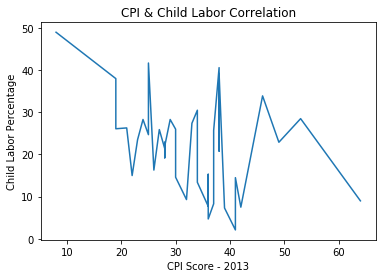

In [50]:
# Let's plot CPI by Child Labor % for Africa
plt.plot(africa_cpi_cl.columns['CPI 2013 Score'],
         africa_cpi_cl.columns['Total (%)'])
plt.xlabel('CPI Score - 2013')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')
plt.show()

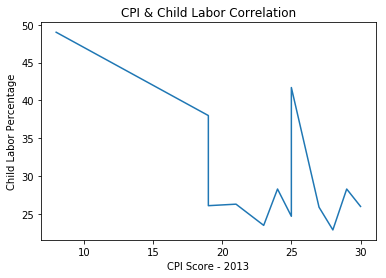

In [51]:
# Let's plot a similar CPI by Child Labor % plot
# but this time for all the African countries above the mean

plt.plot(highest_cpi_cl.columns['CPI 2013 Score'],
         highest_cpi_cl.columns['Total (%)'])
plt.xlabel('CPI Score - 2013')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')
plt.show()

# 7. chat_bokeh.py

In [54]:
# We will import the bokeh package so we can work with 
# bokeh charting plots
from bokeh.plotting import figure, show, output_file

In [1]:
# we are creating an output html file that shows a scatter plot of the chart that uses cpi and Total cl %
def scatter_point(chart, x, y, marker_type):
    chart.scatter(x, y, marker=marker_type, line_color="#6666ee",
                  fill_color="#ee6666", fill_alpha=0.7, size=10)

chart = figure(title="Perceived Corruption and Child Labor in Africa")
output_file("scatter_plot.html")

for row in africa_cpi_cl.rows:
    scatter_point(chart, float(row['CPI 2013 Score']),
                  float(row['Total (%)']), 'circle')

show(chart)

NameError: name 'figure' is not defined